In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('data/clean_cdi.csv')

Top 5 Death-Related Topics: ['Alcohol', 'Health Status', 'Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease', 'Cancer']


<Figure size 1200x800 with 0 Axes>

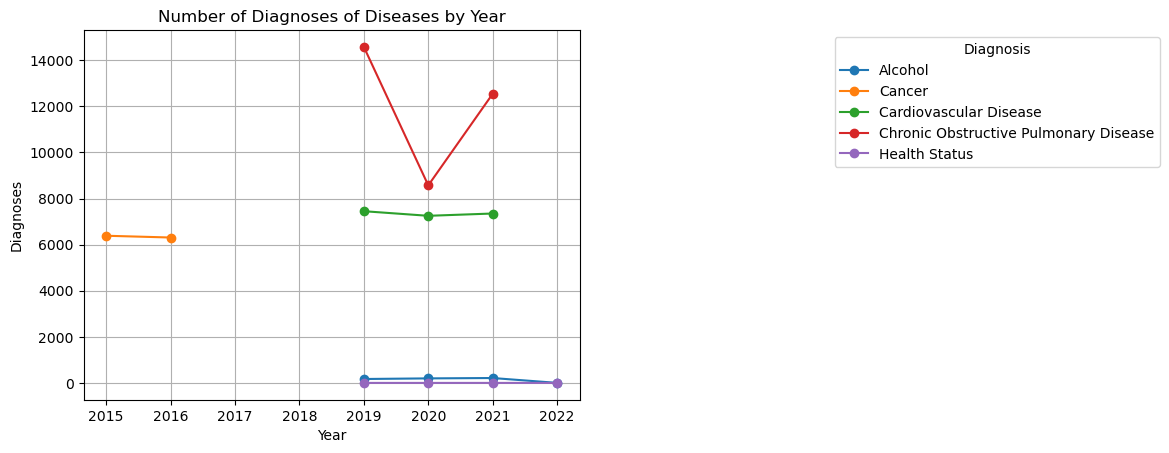

In [46]:
deaths_df = df[df['datavalueunit'] == 'Number']

top5_diags = deaths_df['topic'].value_counts().head(5).index.tolist()
#Filter the top 5
print("Top 5 Death-Related Topics:", top5_diags)

top5df = deaths_df[deaths_df['topic'].isin(top5_diags)]
#Select data in top 5
grouped = top5df.groupby(['yearstart', 'topic'])['datavalue'].mean().reset_index()

pivoted = grouped.pivot(index='yearstart', columns='topic', values='datavalue')

plt.figure(figsize=(12,8))
pivoted.plot(marker='o')
plt.title('Number of Diagnoses of Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Diagnoses')
plt.grid(True)
plt.legend(title='Diagnosis', bbox_to_anchor=(1.5, 1), loc='upper left')
plt.show()

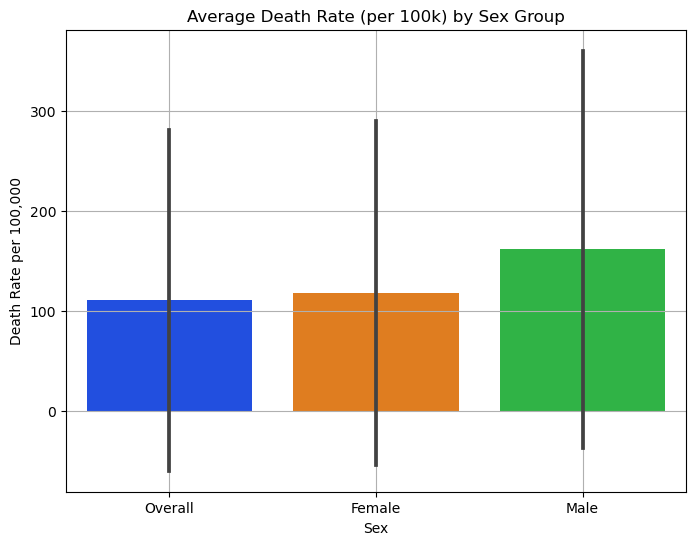

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sexdf = df[df['datavalueunit'] == 'per 100,000']

# stratification by Sex
sexdf = df[df['stratification1'].isin(['Male', 'Female', 'Overall'])]

plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x='stratification1',
    y='datavalue',
    errorbar='sd',  
    palette='bright'
)
plt.title('Average Death Rate (per 100k) by Sex Group')
plt.xlabel('Sex')
plt.ylabel('Death Rate per 100,000')
plt.grid(True)
plt.show()
